<a href="https://colab.research.google.com/github/Ruqyai/Bias-in-Artificial-Intelligence/blob/master/Bias_in_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Bias in AI
***

##Exploratory Analysis  

###The Dataset  
We 'll work with the [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income)

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:  

●	`age`:the age of an individual   
○	Integer greater than 0   

●	`workclass`:a general term to represent the employment status of an individual.    
○	`Private`, `Self-emp-not-inc`, `Self-emp-inc`, `Federal-gov`, `Local-gov`, `State-gov`, `Without-pay`, and `Never-worked`.

●	`fnlwgt`:final weight. In other words, this is the number of people the census believes the entry represents..   
○	Integer greater than 0  

●	`education`:the highest level of education achieved by an individual.    
○	Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.  

●	`education_­num`:the highest level of education achieved in numerical form. An enumeration of the categorical representation of education. The higher the number, the higher the education that individual achieved. For example, an `education_num` of `11` represents `Assoc_voc` (associate degree at a vocational school), an `education_num` of `13` represents `Bachelors`, and an `education_num` of `9` represents `HS-grad` (high school graduate).   
○	Integer greater than 0  

●	`marital_­status`:marital status of an individual. `Married-civ-spouse` corresponds to a civilian spouse while `Married-AF-spouse` is a spouse in the Armed Forces.  
○	 `Married-civ-spouse`, `Divorced`, `Never-married`, `Separated`, `Widowed`, `Married-spouse-absent`, and `Married-AF-spouse`.  

●	`occupation`:the general type of occupation of an individual  
○	`Adm-clerical`, `Exec-managerial`, `Handlers-cleaners`,
       `Prof-specialty`, `Other-service`, `Sales`, `Craft-repair`,
       `Transport-moving`, `Farming-fishing`, `Machine-op-inspct`,
       `Tech-support`,  `Protective-serv`, `Armed-Forces`,
       `Priv-house-serv`.  

●	`relationship`:represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all   
○	`Not-in-family`, `Husband`, `Wife`, `Own-child`, `Unmarried`,
       `Other-relative`.  

●	`race`:Descriptions of an individual’s race  
○	`White`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, `Black`, and `Other`.   

●	`sex`:the biological sex of the individual  
○	`Male`, `Female ` 

●	`capital­_gain`:capital gains for an individual, represented in US Dollars.   
○	Integer greater than or equal to 0   

●	`capital_­loss`:capital loss for an individual, represented in US Dollars.  
○	Integer greater than or equal to 0  

●	`hours_­per_­week`:the hours an individual has reported to work per week  
○	continuous.  

●	`native­_country`:country of origin for an individual  
○	`United-States`, `Cambodia`, `England`, `Puerto-Rico`, `Canada`, `Germany`, `Outlying-US(Guam-USVI-etc)`, `India`, `Japan`, and more.  

●	`the label`:whether or not an individual makes more than $50,000 annually.  
○	<=50k, >50k


# Before training, check if there are potential biases

<h2>Exploratory Data Analysis : Data Really, Really Matters</h2>


In [1]:
#@title Import revelant modules and install Facets
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the Adult Dataset


In [2]:
#@title Read training dataset from CSV {display-mode: "form"}

COLUMNS = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"]

train_csv = tf.keras.utils.get_file('adult.data', 
  'https://download.mlcc.google.com/mledu-datasets/adult_census_train.csv')
test_csv = tf.keras.utils.get_file('adult.data', 
  'https://download.mlcc.google.com/mledu-datasets/adult_census_test.csv')

train_df = pd.read_csv(train_csv, names=COLUMNS, sep=r'\s*,\s*', 
                       engine='python', na_values="?")
test_df = pd.read_csv(test_csv, names=COLUMNS, sep=r'\s*,\s*', skiprows=[0],
                      engine='python', na_values="?")


train_df

3981312/3974305 [==============================] - 0s 0us/step


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Analyzing the Adult Dataset with Facets



[FACETS](https://pair-code.github.io/facets/) contains two robust visualizations to aid in understanding and analyzing machine learning datasets. Get a sense of the shape of each feature of your dataset using Facets Overview, or explore individual observations using Facets Dive.
* Missing feature values 
* Unexpected feature values
* Data Skews

<h2>Facets Overview</h2>

In [3]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train_df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

<h2>Facets Dive</h2>
Use the menus on the left panel of the visualization to change how the data is organized:

1. In the **Binning | X-Axis** menu, select **education**, and in the **Color By** and  **Label By** menus, select **income_bracket**. How would you describe the relationship between education level and income bracket?

2. Next, in the **Binning | X-Axis** menu, select  **marital_status**, and in the **Color By** and  **Label By** menus, select **gender**. What noteworthy observations can you make about the gender distributions for each marital-status category?

In [4]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE = 5000 #@param
  
train_dive = train_df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

# Training

In [5]:
#@title  Create and train the classifier Model

# ----convert a pandas DataFrame into a Numpy array, which is an accepted data type----
def pandas_to_numpy(data):
  '''Convert a pandas DataFrame into a Numpy array'''
  # Drop empty rows.
  data = data.dropna(how="any", axis=0)

  # Separate DataFrame into two Numpy arrays"
  labels = np.array(data['income_bracket'] == ">50K")
  features = data.drop('income_bracket', axis=1)
  features = {name:np.array(value) for name, value in features.items()}
  
  return features, labels

#----Create categorical feature columns----
# Since we don't know the full range of possible values with occupation and
# native_country, we'll use categorical_column_with_hash_bucket() to help map
# each feature string into an integer ID.
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    "occupation", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket(
    "native_country", hash_bucket_size=1000)

# For the remaining categorical features, since we know what the possible values
# are, we can be more explicit and use categorical_column_with_vocabulary_list()
gender = tf.feature_column.categorical_column_with_vocabulary_list(
    "gender", ["Female", "Male"])
race = tf.feature_column.categorical_column_with_vocabulary_list(
    "race", [
        "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"
    ])
education = tf.feature_column.categorical_column_with_vocabulary_list(
    "education", [
        "Bachelors", "HS-grad", "11th", "Masters", "9th",
        "Some-college", "Assoc-acdm", "Assoc-voc", "7th-8th",
        "Doctorate", "Prof-school", "5th-6th", "10th", "1st-4th",
        "Preschool", "12th"
    ])
marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    "marital_status", [
        "Married-civ-spouse", "Divorced", "Married-spouse-absent",
        "Never-married", "Separated", "Married-AF-spouse", "Widowed"
    ])
relationship = tf.feature_column.categorical_column_with_vocabulary_list(
    "relationship", [
        "Husband", "Not-in-family", "Wife", "Own-child", "Unmarried",
        "Other-relative"
    ])
workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    "workclass", [
        "Self-emp-not-inc", "Private", "State-gov", "Federal-gov",
        "Local-gov", "?", "Self-emp-inc", "Without-pay", "Never-worked"
    ])

#-----Create numeric feature columns ------
# For Numeric features, we can just call on feature_column.numeric_column()
# to use its raw value instead of having to create a map between value and ID.
age = tf.feature_column.numeric_column("age")
fnlwgt = tf.feature_column.numeric_column("fnlwgt")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

#----Bucketing to convert age from a numeric feature to a categorical feature----
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

#-----define which feature we will include in our model----
# List of variables, with special handling for gender subgroup.
variables = [native_country, education, occupation, workclass, 
             relationship, age_buckets]
subgroup_variables = [gender]
feature_columns = variables + subgroup_variables

#-----creates the deep columns required to define the input layer of the mode----
deep_columns = [
    tf.feature_column.indicator_column(workclass),
    tf.feature_column.indicator_column(education),
    tf.feature_column.indicator_column(age_buckets),
    tf.feature_column.indicator_column(relationship),
    tf.feature_column.embedding_column(native_country, dimension=8),
    tf.feature_column.embedding_column(occupation, dimension=8),
]

#----Define Deep Neural Net Model-----

# Parameters from form fill-ins
HIDDEN_UNITS_LAYER_01 = 128 #@param
HIDDEN_UNITS_LAYER_02 = 64 #@param
LEARNING_RATE = 0.1 #@param
L1_REGULARIZATION_STRENGTH = 0.001 #@param
L2_REGULARIZATION_STRENGTH = 0.001 #@param

RANDOM_SEED = 512
tf.random.set_seed(RANDOM_SEED)

# List of built-in metrics that we'll need to evaluate performance.
METRICS = [
  tf.keras.metrics.TruePositives(name='tp'),
  tf.keras.metrics.FalsePositives(name='fp'),
  tf.keras.metrics.TrueNegatives(name='tn'),
  tf.keras.metrics.FalseNegatives(name='fn'), 
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tf.keras.metrics.AUC(name='auc'),
]

regularizer = tf.keras.regularizers.l1_l2(
    l1=L1_REGULARIZATION_STRENGTH, l2=L2_REGULARIZATION_STRENGTH)

model = tf.keras.Sequential([
  layers.DenseFeatures(deep_columns),
  layers.Dense(
      HIDDEN_UNITS_LAYER_01, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(
      HIDDEN_UNITS_LAYER_02, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(
      1, activation='sigmoid', kernel_regularizer=regularizer)
])

model.compile(optimizer=tf.keras.optimizers.Adagrad(LEARNING_RATE),  
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

#------it Deep Neural Net Model to the Adult Training Dataset---
EPOCHS = 10 #@param
BATCH_SIZE = 500 #@param

features, labels = pandas_to_numpy(train_df)
model.fit(x=features, y=labels, epochs=EPOCHS, batch_size=BATCH_SIZE)


#------Evaluate Deep Neural Net Performance--------
features, labels = pandas_to_numpy(test_df)
loss,tp,fp,tn,fn,accuracy,precision,recall,auc=model.evaluate(x=features, y=labels)

print('Accuracy is a round : {}'.format(round(accuracy,4)))
print('Precision is a round : {}'.format(round(precision,4)))
print('Recall is is a round : {}'.format(round(recall,4)))



Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
61/61 [==============================] - 0s 7ms/step - loss: 1.8383 - tp: 1298.0000 - fp: 678.0000 - tn: 21976.0000 - fn: 6210.0000 - accuracy: 0.7716 - precision: 0.6569 - recall: 0.1729 - auc: 0.7895
Epoch 2/10
61/61 [==============================] - 0s 7ms/step - loss: 1.4138 - tp: 3721.0000 - fp: 1509.0000 - tn: 21145.0000 - fn: 3787.0000 - accuracy: 0.8244 - precision: 0.7115 - recall: 0.4956 - auc: 0.8669
Epoch 3/10
61/61 [==============================] - 0s 6ms/step - loss: 1.1150 - tp: 3978.0000 - fp: 1612.0000 - tn: 21042.0000 - fn: 3530.0000 - accuracy: 0.8295 - precision: 0.7116 - recall: 0.5298 - auc: 0.8756
Epoch 4/10
61/61 [==============================] - 0s 6ms/step - loss: 0.8828 - tp: 4004.0000 - fp: 1650.0000 - tn: 21004.0000 - fn: 3504.0000 - accuracy: 0.8291 - precision: 0.7082 - recall: 0.5333 - auc: 0.8772
Epoch 5/10
61/61 [=================

# After training, check if there are potential biases

##Evaluating for Fairness Using a Confusion Matrix

,ACCURACY,PRECISION,RECALL
Female,0.9131,0.6915,0.4254


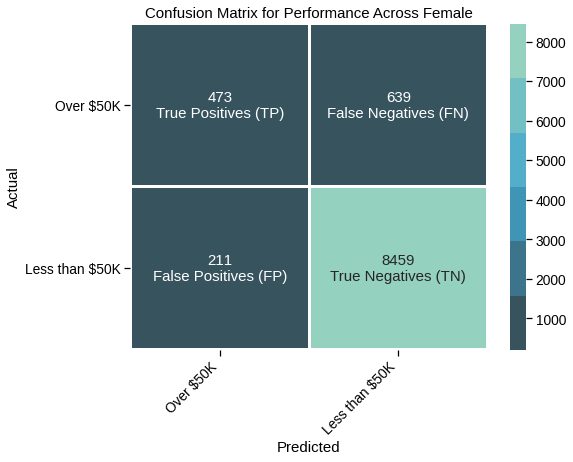

In [6]:
#@title Define Function to Visualize Binary Confusion Matrix and Visualize Binary Confusion Matrix and Compute Evaluation Metrics Per Subgroup


#---------Define Function to Visualize Binary Confusion Matrix-------
def plot_confusion_matrix(
    confusion_matrix, class_names, subgroup, figsize = (8,6)):
  # We're taking our calculated binary confusion matrix that's already in the 
  # form of an array and turning it into a pandas DataFrame because it's a lot 
  # easier to work with a pandas DataFrame when visualizing a heat map in 
  # Seaborn.
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names, 
  )

  rcParams.update({
  'font.family':'sans-serif',
  'font.sans-serif':['Liberation Sans'],
  })
  
  sns.set_context("notebook", font_scale=1.25)

  fig = plt.figure(figsize=figsize)

  plt.title('Confusion Matrix for Performance Across ' + subgroup)

  # Combine the instance (numercial value) with its description
  strings = np.asarray([['True Positives (TP)', 'False Negatives (FN)'],
                        ['False Positives (FP)', 'True Negatives (TN)']])
  labels = (np.asarray(
      ["{0:g}\n{1}".format(value, string) for string, value in zip(
          strings.flatten(), confusion_matrix.flatten())])).reshape(2, 2)

  heatmap = sns.heatmap(df_cm, annot=labels, fmt="", 
      linewidths=2.0, cmap=sns.color_palette("GnBu_d"));
  heatmap.yaxis.set_ticklabels(
      heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  heatmap.xaxis.set_ticklabels(
      heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  return fig

  
#--------Visualize Binary Confusion Matrix and Compute Evaluation Metrics Per Subgroup------  
CATEGORY  =  "gender" #@param {type:"string"}
SUBGROUP =  "Female" #@param {type:"string"}

# Labels for annotating axes in plot.
classes = ['Over $50K', 'Less than $50K']

# Given define subgroup, generate predictions and obtain its corresponding 
# ground truth.
subgroup_filter  = test_df.loc[test_df[CATEGORY] == SUBGROUP]
features, labels = pandas_to_numpy(subgroup_filter)
subgroup_results = model.evaluate(x=features, y=labels, verbose=0)
confusion_matrix = np.array([[subgroup_results[1], subgroup_results[4]], 
                             [subgroup_results[2], subgroup_results[3]]])

subgroup_performance_metrics = {
    'ACCURACY': subgroup_results[5],
    'PRECISION': subgroup_results[6], 
    'RECALL': subgroup_results[7],
}
performance_df = pd.DataFrame(subgroup_performance_metrics, index=[SUBGROUP])
pd.options.display.float_format = '{:,.4f}'.format

plot_confusion_matrix(confusion_matrix, classes, SUBGROUP);
performance_df



>${Accuracy} = \frac{TP+TN}{TP+FP+TN+FN}$    
>${Precision} = \frac{TP}{TP+FP}$     
>${Recall} = \frac{TP}{TP+FN}$  

**Before subgroups**   
Accuracy = 0.8311  
Precision = 0.6952  
Recall = 0.5723  

**Female**  
Accuracy  = 0.9131	
Precision =  0.6915	
Recall  = 0.4254

**Male**	
Accuracy  = 0.7917	
Precision = 0.6957	
Recall  = 0.5979


Try [What-If Tool ](https://colab.research.google.com/github/pair-code/what-if-tool/blob/master/What_If_Tool_Notebook_Usage.ipynb). It is another tool that can help you for fairness.  For more details [ please read this](https://pair-code.github.io/what-if-tool/ai-fairness.html). and try the [Demo](https://pair-code.github.io/what-if-tool/demos/uci.html)